### Importing Libraries and Dataset

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Downloading the Dataset

api = KaggleApi()
api.authenticate()

api.dataset_download_files(
    "ngshiheng/michelin-guide-restaurants-2021",
    path=".",   
    unzip=True 
)

Dataset URL: https://www.kaggle.com/datasets/ngshiheng/michelin-guide-restaurants-2021


In [3]:
data = pd.read_csv('michelin_my_maps.csv')
data.head(3)

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,GreenStar,FacilitiesAndServices,Description
0,ES:SENZ,"Mietenkamer Straße 65, Grassau, 83224, Germany","Grassau, Germany",€€€€,"Creative, Modern Cuisine",12.465618,47.785630,4.986414e+11,https://guide.michelin.com/en/bayern/grassau/r...,https://www.das-achental.com/,3 Stars,0,"Air conditioning,Car park,Interesting wine list","Here in the restaurant of Das Achental hotel, ..."
1,Tohru in der Schreiberei,"Burgstraße 5, Munich, 80331, Germany","Munich, Germany",€€€€,"Modern Cuisine, Japanese Contemporary",11.577475,48.137597,4.989215e+11,https://guide.michelin.com/en/bayern/mnchen/re...,https://schreiberei-muc.de/,3 Stars,0,"Interesting wine list,Notable sake list",It is absolutely worth climbing the 23 steps o...
2,Schwarzwaldstube,"Tonbachstraße 237, Baiersbronn, 72270, Germany","Baiersbronn, Germany",€€€€,"Classic French, Creative",8.358280,48.536911,4.974425e+11,https://guide.michelin.com/en/baden-wurttember...,https://www.traube-tonbach.de/restaurants-bar/...,3 Stars,0,"Air conditioning,Car park,Great view,Interesti...","Schwarzwaldstube, the flagship restaurant of t..."


# Data Analysis

### Looks like there are some columns that will have no value for the analysis 
### Such as Url, WebsiteUrl,Address and PhoneNumber. Thus ,i will drop them

In [4]:
data = data.drop(['Url','WebsiteUrl','Address','PhoneNumber'],axis = 1)

In [5]:
data['Award'].value_counts()

Award
Selected Restaurants    11243
Bib Gourmand             3414
1 Star                   3097
2 Stars                   511
3 Stars                   157
Name: count, dtype: int64

In [6]:
data.isna().sum()
# The columns with NA are the categories of Selected Restaurants + Bib Gourmand and FacilitiesAndServices

Name                       0
Location                   0
Price                      0
Cuisine                    0
Longitude                  0
Latitude                   0
Award                      0
GreenStar                  0
FacilitiesAndServices    979
Description                0
dtype: int64

### Hence, this guide lists 11,243 restaurants with the following classifications:

- **Bib Gourmand (3,414):** Restaurants recognized for good quality and good value, but **without Michelin stars**.  
- **1 Star (3,097):** “A very good restaurant in its category.”  
- **2 Stars (511):** “Excellent cooking, worth a detour.”  
- **3 Stars (157):** “Exceptional cuisine, worth a special journey.”

### 

In [7]:
data['Location'].value_counts()

Location
Tokyo, Japan                       551
Paris, France                      466
London, United Kingdom             349
Singapore                          299
New York, USA                      265
                                  ... 
Saint-Laurent-sur-Saône, France      1
Cliousclat, France                   1
Parçay-Meslay, France                1
Villecresnes, France                 1
San Roque, Spain                     1
Name: count, Length: 5847, dtype: int64

# WORLD VISION 

### Initially i want to analyse the world and answer the following 5 questions:

1. In which countries these restaurants are more concentrated?
2. How the stars are spread in these countries? 
3. Price distribution per country
4. Which country and cuisine has the lowest ratio Price/Star ? Thus, get to have this prestige with the lowest cost
5. Which country has the biggest diversity? ( ex : japan = mostly japanese , France = balanced etc)


## 1. Concentration of Countries on michelin

In [8]:
countries=data["Location"].str.split(',').str[-1].str.strip()
data['Countries'] = countries
# I transform ,in the column , each string in a list
# Then i take the last column of this string 
# And i remove extra spaces 

In [9]:
# Thus ,i can finally get a list of the countries that have the biggest restaurants in the catalog 
# and take the 3rd quartile in order to see how concentrated is the list

world_locations =countries.value_counts()
q3 = world_locations.quantile(0.75)

/var/folders/tz/tl_w5k6s62vcg00cl2mjjbtc0000gn/T/ipykernel_255/3844998658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_countries.values, y = top_countries.index , palette ='viridis')


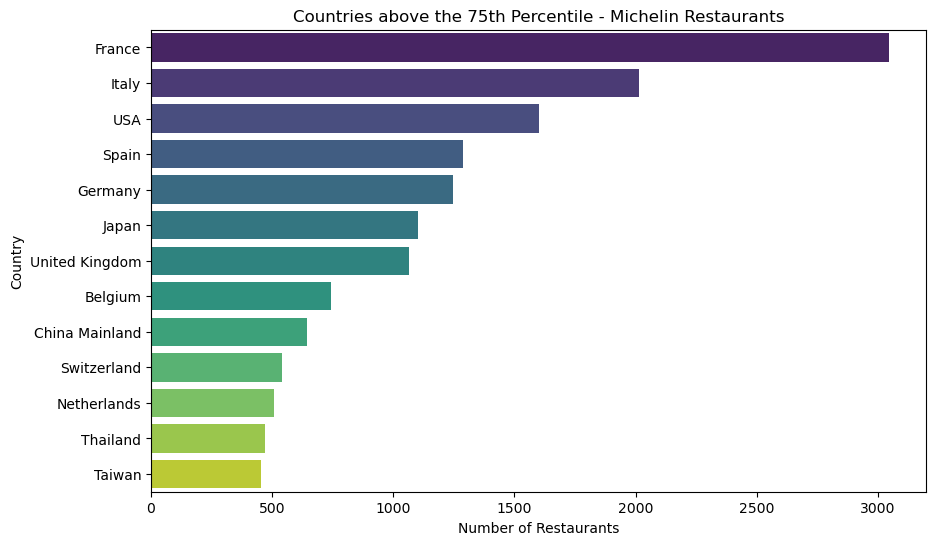

In [10]:
top_countries = world_locations[world_locations >=q3]

plt.figure(figsize=(10,6))
sns.barplot(x = top_countries.values, y = top_countries.index , palette ='viridis')
plt.title("Countries above the 75th Percentile - Michelin Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Country")
plt.show()

### Thus, most restaurants are concentrated on the following countries: 

1. France
2. Italy
3. USA
4. Spain
5. Germany
6. Japan
7. UK

This shows how representative these countries are to the cuisine over the world and maybe the impact of it on all over restaurants. Does the kind of restaurant follows this trend? The majority of michelin restaurants , even from other countries, are also on this list? 

If yes, this could be an indicative of a parameter of success of obtaining a michelin star

## 2. How the stars are spread in these countries? 

### first i need to normalize the column into numbers

In [19]:
# I will make a copy in order not to corrupt the original df
df = data.copy()
df['Stars'] = df['Award'].str.extract(r'(\d+)').astype(float)

# str.extract looks for numbers on the string and transform in NaN all the others
# astype(float) transform the result into float 


In [12]:
# First i want only the 7 countries that i analyzed before , thus i filter
top7= top_countries.index[:7]
stars_by_country = df[df['Countries'].isin(top7)]
#stars_by_country = best_countries.groupby(['Countries','Stars'])



In [13]:
stars_by_country['Countries'].unique()
# It is filtered

array(['Germany', 'France', 'Japan', 'United Kingdom', 'USA', 'Italy',
       'Spain'], dtype=object)

In [14]:
# unstack to transform stars into columns and sort descending with a temporary column
graph_stars = stars_by_country.groupby(["Countries","Stars"]).size().unstack(fill_value=0)

graph_stars['Total'] = graph_stars.sum(axis=1)
graph_stars = graph_stars.sort_values(by='Total', ascending = False)
graph_stars = graph_stars.drop(columns = 'Total')


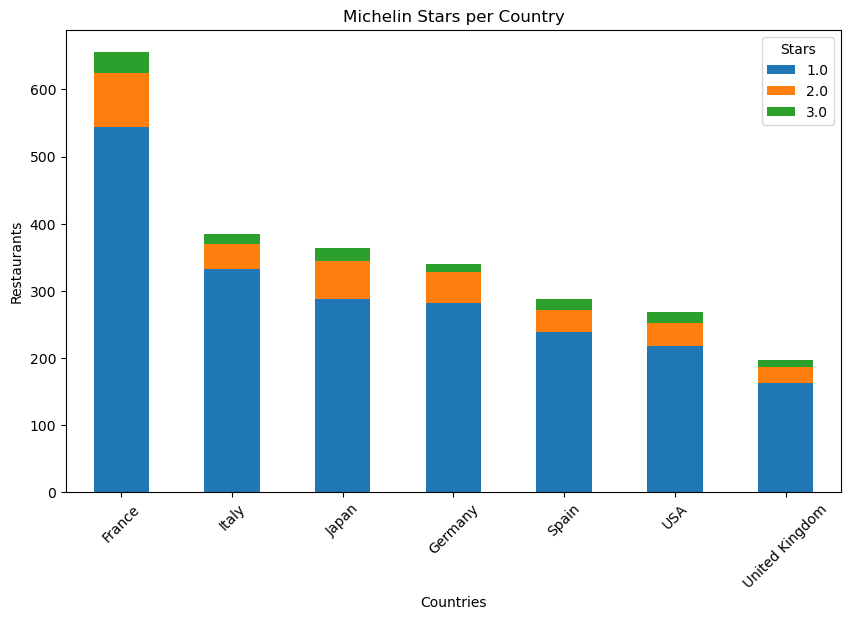

In [15]:
# Plot a stacked graph in order to analyse better

graph_stars.plot(kind='bar',stacked = True, figsize=(10,6))

plt.title("Michelin Stars per Country")
plt.xlabel("Countries")
plt.ylabel("Restaurants")
plt.legend(title="Stars")
plt.xticks(rotation = 45)
plt.show()

 What about the Stars in potential , Bib Gourmand, they follow the same trend or there is a shift ?

In [20]:
#Filter only the bib gourmand
bib_gourmand = data[data['Award']== 'Bib Gourmand']

bib_by_country = bib_gourmand['Countries'].value_counts().reset_index()

top_bib = bib_by_country[:10]
top_bib.columns = ['Country', 'Restaurants']

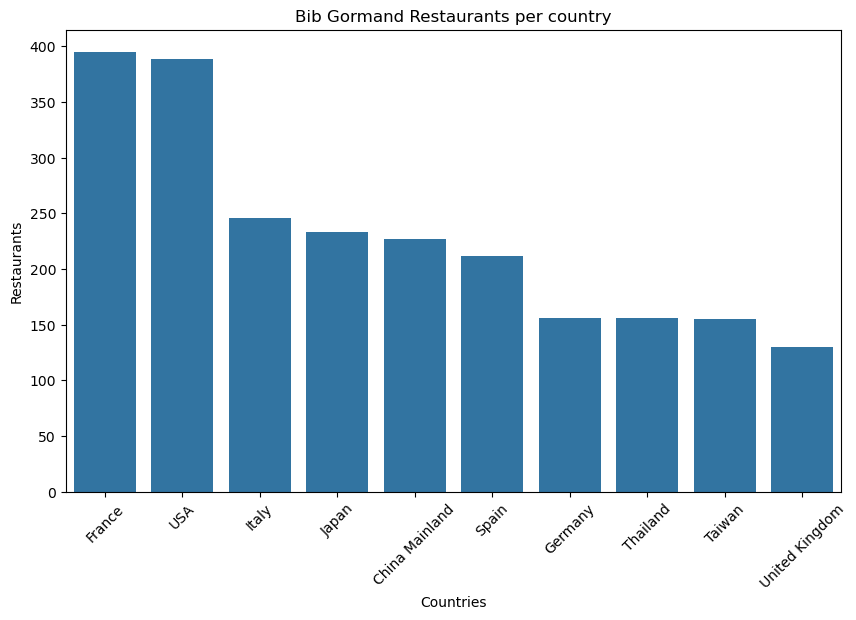

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_bib, x= "Country" , y= 'Restaurants')

plt.title("Bib Gormand Restaurants per country")
plt.xlabel("Countries")
plt.ylabel("Restaurants")
plt.xticks(rotation = 45)
plt.show()

Thus ,  though the majority of the countries that the michelin stars appears, i can notice two things :
1. USA is not as concentrated as France but for potential michelin stars, they are very close to France. This could change the scenario in the future because the expansion of stars in USA could be growing as fast as france
2. In potential restaurants, some asian countries as China, Thailand and Taiwan appear, changing the landscape of europe countries that dominate the scenario. The restaurants of these countries follow the same configuration as the top7 countries of michelin stars or they are recognize by their original cuisine?

## 3. Price distribution per country


In [60]:
check_prices = data[data["Countries"].isin(["China Mainland"])]

check_prices[["Countries","Price"]].head(15)

,Countries,Price
177,China Mainland,¥¥¥¥
914,China Mainland,¥¥¥¥
915,China Mainland,¥¥¥
916,China Mainland,¥¥¥
917,China Mainland,¥¥¥¥
918,China Mainland,¥¥¥
919,China Mainland,¥¥¥¥
920,China Mainland,¥¥¥
921,China Mainland,¥¥¥¥
922,China Mainland,¥¥¥


In [32]:
data["Price"].value_counts()

Price
€€      4790
€€€     3505
€€€€    2173
$$      1271
$$$      919
$$$$     877
¥¥¥      789
$        549
€        472
¥¥       471
££       413
£££      383
¥¥¥¥     265
££££     253
¥        224
฿฿       200
฿        142
₩         95
₫         83
฿฿฿       82
₩₩        60
₫₫        55
₺₺₺       49
₩₩₩₩      48
฿฿฿฿      48
₺₺        41
₩₩₩       37
₫₫₫       27
₺₺₺₺      25
£         16
₫₫₫₫      16
﷼﷼﷼       14
₺         12
﷼﷼﷼﷼       8
﷼﷼         7
﷼          3
Name: count, dtype: int64

Since this column has the price on the local coin ,i will make a pattern for EURO 

Accordinly with the michelin website ,all these symbles have a price index . So i will use this table provided by them and turn all this column in an 
Euro based number  (since it is a category range)

https://guide.michelin.com/en/restaurants-price-ranges-index


In [43]:
# first i only want to keep some countries

countries_keep = [
    "France", "USA", "Italy", "Japan", "China Mainland",
    "Spain", "Germany", "Thailand", "Taiwan", "United Kingdom"
]

data = data[data["Countries"].isin(countries_keep)]
data["Countries"].value_counts()

Countries
France            3046
Italy             2013
USA               1601
Spain             1289
Germany           1246
Japan             1104
United Kingdom    1065
China Mainland     645
Thailand           472
Taiwan             455
Name: count, dtype: int64

In [61]:
# differentiate china and taiwan and japan

def normalize_price_symbol(row):
    country = row["Countries"]
    symbol = row["Price"]

    if country == "China Mainland":
        return symbol + "c"   # ex: ¥ -> ¥c
    elif country == "Taiwan":
        return symbol + "t"   # ex: $ -> $t
    else:
        return symbol

data["PriceNorm"] = data.apply(normalize_price_symbol, axis=1)

In [64]:
price_mapping = {
    # Euro-Zone (France, Italy, Spain, Germany)
    "€": 30, "€€": 50, "€€€": 80, "€€€€": 120,
    # USA
    "$": 20, "$$": 40, "$$$": 60, "$$$$": 100,
    # UK
    "£": 20, "££": 40, "£££": 70, "££££": 100,
    # Japan
    "¥": 2500, "¥¥": 7500, "¥¥¥": 20000, "¥¥¥¥": 30000,
    # China Mainland
    "¥c": 50, "¥¥c": 250, "¥¥¥c": 700, "¥¥¥¥c": 1500,  # (c = china)
    # Thailand
    "฿": 150, "฿฿": 900, "฿฿฿": 2750, "฿฿฿฿": 4200,
    # Taiwan
    "$t": 150, "$$t": 1150, "$$$t": 3000, "$$$$t": 5000,
}

exchange = {
    "EUR": 1.0,
    "USD": 0.93,
    "GBP": 1.17,
    "JPY": 0.0062,
    "CNY": 0.13,
    "THB": 0.026,
    "TWD": 0.029
}

In [65]:
def convert_to_euro(symbol):
    if symbol not in price_mapping:
        return None
    
    value_local = price_mapping[symbol]
    
    # which coin -> Japan and china are already different
    if "€" in symbol:
        rate = exchange["EUR"]
    elif "£" in symbol:
        rate = exchange["GBP"]
    elif "¥c" in symbol:   # China
        rate = exchange["CNY"]
    elif "¥" in symbol:   # Japan
        rate = exchange["JPY"]
    elif "฿" in symbol:
        rate = exchange["THB"]
    elif "$t" in symbol:  # Taiwan
        rate = exchange["TWD"]
    else:  # default = USD
        rate = exchange["USD"]
    
    return round(value_local * rate, 2)

In [66]:
data['PriceEUR'] = data["PriceNorm"].apply(convert_to_euro)

Finally, after this treatment i can see how expensive are the michelin stars on these countries

In [101]:
# only the restaurants with michelin stars

stars = data['Award'].isin(['1 Star','2 Stars','3 Stars']) # this is a boolean mask  -> True and false 
stars_data = data[stars]                                   # now it works

stars_data["Award"][stars].value_counts()

Award
1 Star     2256
2 Stars     344
3 Stars     126
Name: count, dtype: int64

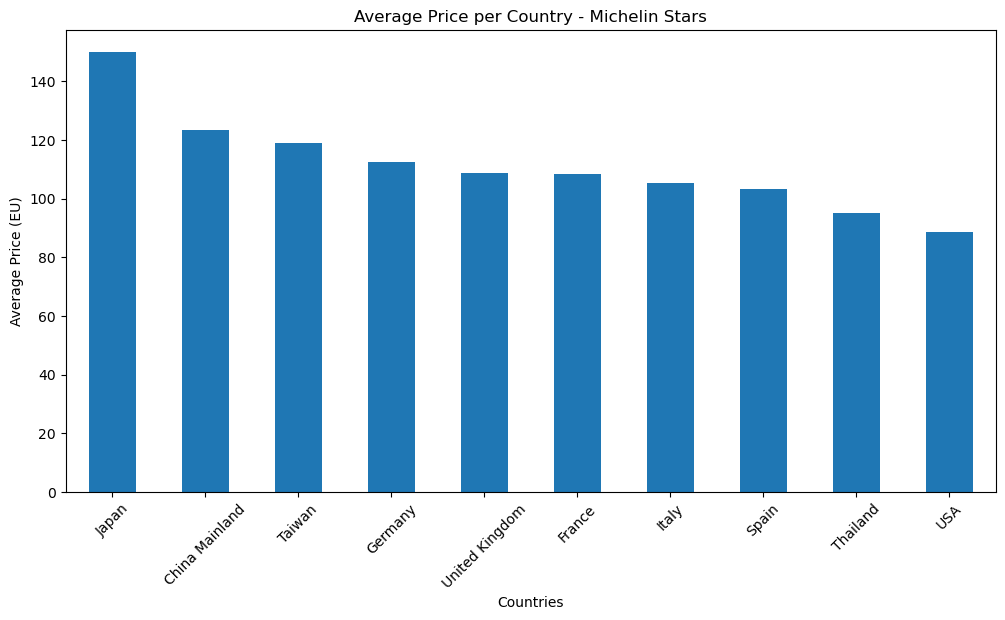

In [115]:
group = stars_data.groupby("Countries")["PriceEUR"].mean() 
#Now group is not a dataframe with many columns anymore .it is a series 
# indice = countries 
# values = priceEUR ( mean )

group_sorted = group.sort_values(ascending=False)

group_sorted.plot(kind= 'bar' , figsize=(12,6))
plt.ylabel("Average Price (EU)")
plt.xlabel("Countries")
plt.title('Average Price per Country - Michelin Stars')
plt.xticks(rotation = 45)
plt.show()


Japan and China are dominating the price per michelin stars ! 

So despite they don't have as many michelin restaurants as France , their ticket rate is very high (all normalized in euro ! ). Specially China, that is not even on the top7 countries with the most stars on the world. 

Thus, china is an outlier for getting such a high ticket having not so many restaurants and Japan passing France having less restaurants can lead to the conclusion of the cost of life of the japaneses

# 4. Which country and cuisine has the lowest ratio Price/Star ? 

## 4.1 Country vs ratio Price/Star

## 4.2 Cuisine vs Price/Star